In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import random
import pickle

In [3]:
DailyAggSentimentList = []
FamilyQuestionList = []
NumberOfHoursLateList = []
WeeklyIncidentsList = []
NumberSickDaysList = []
AnomalousList = []

In [20]:
percentAnomalous = .3
percentReallyAnomalous = .1
chanceAnomalous = 0

def generateData ():

  DailyAggSentiment = random.uniform(.8, 1)
  FamilyQuestion = random.uniform(.8, 1)
  NumberOfHoursLate = math.floor(random.uniform(-5, 10))
  WeeklyIncidents = math.floor(random.uniform(0, 2))
  NumberSickDays = 0
  Anomalous = 0

  chance = random.uniform(0, 1)

  if chance < percentAnomalous:

    chanceAnomalous = random.uniform(.2, .6)
    Anomalous = 1

    if random.uniform(0, 1) < chanceAnomalous:
      DailyAggSentiment = random.uniform(.4, .7)

    if random.uniform(0, 1) < chanceAnomalous:
      FamilyQuestion = random.uniform(.3, .8)

    if random.uniform(0, 1) < chanceAnomalous:
      NumberOfHoursLate = math.floor(random.uniform(5, 25))

    if random.uniform(0, 1) < chanceAnomalous:
      WeeklyIncidents = math.floor(random.uniform(1, 3))

    if random.uniform(0, 1) < chanceAnomalous:
      NumberSickDays = 1

  if chance < percentReallyAnomalous:

    chanceAnomalous = random.uniform(.3, .7)
    Anomalous = 2

    if random.uniform(0, 1) < chanceAnomalous:
      DailyAggSentiment = random.uniform(.15, .5)

    if random.uniform(0, 1) < chanceAnomalous:
      FamilyQuestion = random.uniform(.15, .6)

    if random.uniform(0, 1) < chanceAnomalous:
      NumberOfHoursLate = math.floor(random.uniform(10, 30))

    if random.uniform(0, 1) < chanceAnomalous:
      WeeklyIncidents = math.floor(random.uniform(2, 4))

    if random.uniform(0, 1) < chanceAnomalous:
      NumberSickDays = math.floor(random.uniform(2, 4))



  DailyAggSentimentList.append(DailyAggSentiment)
  FamilyQuestionList.append(FamilyQuestion)
  NumberOfHoursLateList.append(NumberOfHoursLate)
  WeeklyIncidentsList.append(WeeklyIncidents)
  NumberSickDaysList.append(NumberSickDays)
  AnomalousList.append(Anomalous)



In [22]:
numPeopleTrain = 10000
numPeopleTest = 1000

train = None
train_y = None
test = None
test_y = None

for i in range(0, numPeopleTrain):
  generateData()
  train = pd.DataFrame({
    "DailyAggSentiment": DailyAggSentimentList,
    "FamilyQuestion": FamilyQuestionList,
    "NumberOfHoursLate": NumberOfHoursLateList,
    "WeeklyIncidents": WeeklyIncidentsList,
    "NumberSickDays": NumberSickDaysList,
  })
  train_y = AnomalousList

DailyAggSentimentList = []
FamilyQuestionList = []
NumberOfHoursLateList = []
WeeklyIncidentsList = []
NumberSickDaysList = []
AnomalousList = []

for i in range(0, numPeopleTest):
  generateData()
  test = pd.DataFrame({
    "DailyAggSentiment": DailyAggSentimentList,
    "FamilyQuestion": FamilyQuestionList,
    "NumberOfHoursLate": NumberOfHoursLateList,
    "WeeklyIncidents": WeeklyIncidentsList,
    "NumberSickDays": NumberSickDaysList,
  })
  test_y = AnomalousList




In [23]:
classifier = MLPClassifier(
    max_iter=500,
    early_stopping=True
)

In [24]:
classifier.fit(train, train_y)

MLPClassifier(early_stopping=True, max_iter=500)

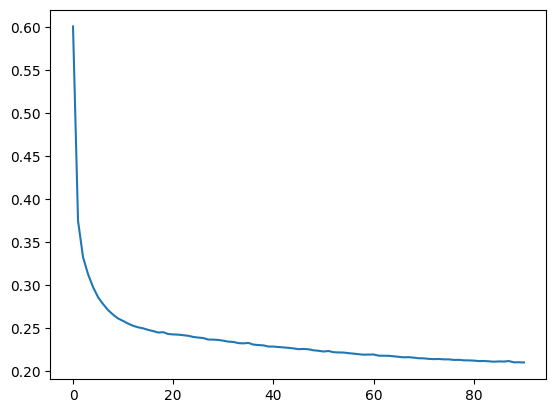

In [25]:
plt.plot(classifier.loss_curve_);

In [26]:
score = classifier.score(test, test_y)
print(f'score: {score:.2f}')

score: 0.94


In [33]:
result = classifier.predict_proba(test[:1])

In [37]:
print(pd.Series(result[0]).idxmax())

1


In [40]:
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))